In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from cmcrameri import cm
import datetime
import pandas as pd
import geopandas
from shapely.geometry import Point
import fiona
import matplotlib.pyplot as plt

os.chdir('/users/marianne/documents/pe_snow_fires/ICB')

In [3]:
df = pd.read_csv('Gridded_Snow_Depths/snowgrid_march16.csv')
df1=df.interpolate()
geometry = [Point(xy) for xy in zip(df.iloc[:, 0], df.iloc[:, 1])]
gdf = geopandas.GeoDataFrame(df, geometry=geometry)

<AxesSubplot:>

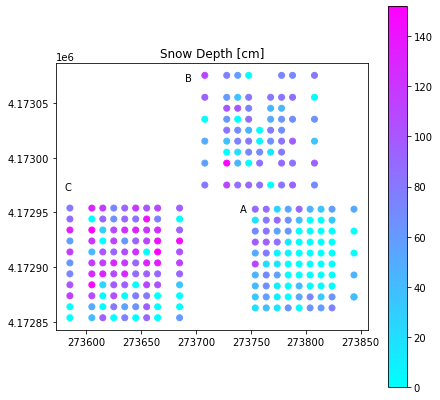

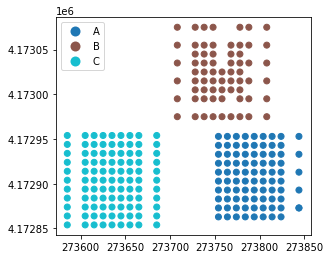

In [4]:
from matplotlib import cm
# gdf.plot(column='Observed Fire Severity', categorical = True,cmap = 'viridis',markersize=100)

fig,ax=plt.subplots(figsize=(7,7))
gdf.plot(column='cm',cmap = 'cool',ax=ax,legend=True,label='Snow Depth [cm]')
ax.text(273740,4172950,'A')
ax.text(273690,4173070,'B')
ax.text(273580,4172970,'C')
ax.set_title('Snow Depth [cm]')
gdf.plot(column='Grid',categorical=True,legend=True)

# fig.colorbar(cm.ScalarMappable(norm=None,cmap='viridis'))
# fig.colorbar(d)
#gdf.plot(column='Grid',cmap = 'viridis')

# gdf.plot(x= 'Average_cm',y= 'cm_mid',cmap = 'viridis',ax=ax,kind='hexbin')

# plt.savefig('raster.tiff')


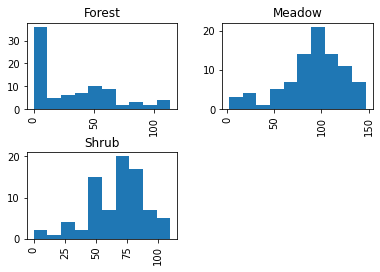

In [11]:
gdf.hist(column='Average_cm',by='Dominant Vegetation')
plt.show()

In [9]:
gdf

,lon_UTM11,lat_UTM11,cm_mid,cm,cm.1,cm.2,cm.3,Tree_Open,Average_cm,Grid,Observed Fire Severity,Dominant Vegetation,geometry
0,273635,4172904.0,120.0,118.0,123.0,114,107,open,116.4,C,High,Meadow,POINT (273635.000 4172904.000)
1,273635,4172914.0,81.0,106.0,80.0,117,113,open,99.4,C,High,Meadow,POINT (273635.000 4172914.000)
2,273635,4172924.0,148.0,61.0,124.0,76,129,open,107.6,C,High,Meadow,POINT (273635.000 4172924.000)
3,273635,4172934.0,131.0,124.0,94.0,120,108,open,115.4,C,High,Meadow,POINT (273635.000 4172934.000)
4,273635,4172944.0,111.0,90.0,89.0,105,94,open,97.8,C,High,Meadow,POINT (273635.000 4172944.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,273708,4173055.0,60.0,95.0,62.0,103,51,open,74.2,B,High,Shrub,POINT (273708.000 4173055.000)
247,273708,4173035.0,0.0,0.0,0.0,0,41,canopy,8.2,B,High,Shrub,POINT (273708.000 4173035.000)
248,273708,4173015.0,65.0,49.0,52.0,65,15,open,49.2,B,High,Shrub,POINT (273708.000 4173015.000)
249,273708,4172995.0,66.0,57.0,80.0,82,55,open,68.0,B,High,Shrub,POINT (273708.000 4172995.000)


In [61]:
df_shrub = pd.read_csv('Gridded_Snow_Depths/shrub_grid_2020.csv')
df1_shrub=df_shrub.interpolate()
geometry = [Point(xy) for xy in zip(df_shrub.iloc[:, 0], df_shrub.iloc[:, 1])]
gdf_shrub = geopandas.GeoDataFrame(df_shrub, geometry=geometry)
gdf_shrub['cm_avg'] = gdf_shrub[['cm','cm.1','cm.2','cm.3','cm.4']].mean(axis=1)

<AxesSubplot:>

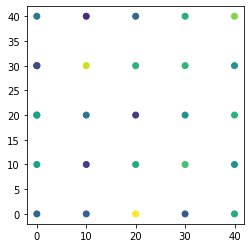

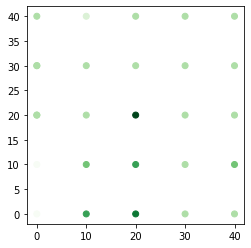

In [64]:
gdf_shrub.plot(column='cm_avg',cmap = 'viridis')
gdf_shrub.plot(column='Coverage',cmap = 'Greens',categorical=True)

In [65]:
df_meadow = pd.read_csv('Gridded_Snow_Depths/meadow_grid_2020.csv')
df1_meadow=df_meadow.interpolate()
geometry = [Point(xy) for xy in zip(df_meadow.iloc[:, 0], df_meadow.iloc[:, 1])]
gdf_meadow = geopandas.GeoDataFrame(df_meadow, geometry=geometry)
gdf_meadow['cm_avg'] = gdf_meadow[['cm','cm.1','cm.2','cm.3','cm.4']].mean(axis=1)

<AxesSubplot:>

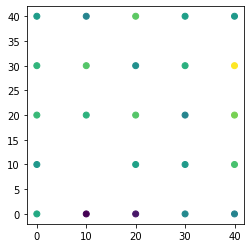

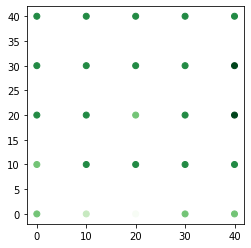

In [67]:
gdf_meadow.plot(column='cm_avg',cmap = 'viridis')
gdf_meadow.plot(column='Coverage',cmap = 'Greens',categorical=True)

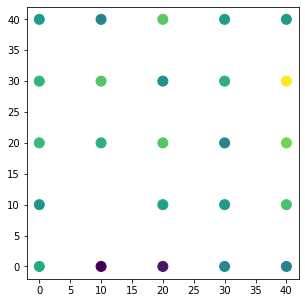

In [83]:
colors = ['red','yellow', 'blue','purple','black']
labels = ['deadtrees', 'livetrees', 'logs','open','smalltrees']
fig,ax=plt.subplots(figsize=(5,5))
gdf_meadow.plot(column='cm_avg',ax=ax,markersize=100)
plt.show()